In [30]:
import numpy as np
import pandas as pd
from os import listdir
from copy import deepcopy
from Utils_MSA import *
from Utils_16S_Analysis import *

import matplotlib.pyplot as plt
rcParams = {'font.size': 24, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}
plt.rcParams.update(rcParams)

def Get_Edits(S1, S2, window=150):
    max_ends = min(len(S1), len(S2))-window
    Edits = []
    for i in range(0, max_ends):
        start, end = i, i+window
        n, M = Edit(S1[start:end], S2[start:end])
        Edits.append(n)
    return Edits

def Load_BLAST_Hits(filepath, qcov_filter = 95, qlen = 150):
    df = pd.read_csv(filepath, sep = "\t", names = ['qseqid', 'sseqid', 'pident', 'length', 'mismatch', 
                                                    'gapopen', 'qstart', 'qend', 'sstart', 'send',
                                                    'evalue', 'bitscore'])
    df['qcov'] = df['length']/qlen*100.0
    df = df[df['qcov'] >= qcov_filter]
    df['Divergence'] = df['mismatch']/qlen*100.0
    df = df.drop_duplicates('qseqid')
    df = df[['qseqid','mismatch']]
    return df


In [2]:
filedir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/\
C_Allele_Relative_Abundance_Sep/BLAST_Comparison/BLAST_Hits/A_Alleles/'
files = listdir(filedir)

Gene_Blast = {}
for g in files:
    if g.startswith('YSG'):
        df_blast_A_Alleles = pd.DataFrame()
        splits = g.split('_')
        gene = splits[0]+'_'+splits[1]
        Allele = 'A'
        samples = listdir(filedir+g+'/')
        for s in samples:
            if s.startswith('MS'):
                blast_hits = listdir(filedir+g+'/'+s+'/')
                for b in blast_hits:
                    if b.startswith('MS'):
                        df = Load_BLAST_Hits(filedir+g+'/'+s+'/'+b)
                        df['Sample'] = s
                        df['Allele'] = Allele
                        df['Gene'] = gene
                        df_blast_A_Alleles = df_blast_A_Alleles.append(df)
        Gene_Blast[gene] = df_blast_A_Alleles
        print(gene)

YSG_0096b
YSG_1447b
YSG_0966
YSG_0699
YSG_1319
YSG_1748
YSG_0898
YSG_1924
YSG_0340
YSG_0764
YSG_0548
YSG_1576
YSG_1709
YSG_1299
YSG_0688
YSG_1142
YSG_1779
YSG_0985
YSG_0168b
YSG_1325
YSG_1272
YSG_0072a
YSG_0314
YSG_0694b
YSG_1487
YSG_1514
YSG_0136a
YSG_0108a
YSG_1367
YSG_0675
YSG_1694


In [3]:
filedir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/\
C_Allele_Relative_Abundance_Sep/BLAST_Comparison/BLAST_Hits/B_Alleles/'
files = listdir(filedir)

for g in files:
    if g.startswith('YSG'):
        df_blast_B_Alleles = pd.DataFrame()
        splits = g.split('_')
        gene = splits[0]+'_'+splits[1]
        Allele = 'B'
        samples = listdir(filedir+g+'/')
        for s in samples:
            if s.startswith('MS'):
                blast_hits = listdir(filedir+g+'/'+s+'/')
                for b in blast_hits:
                    if b.startswith('MS'):
                        df = Load_BLAST_Hits(filedir+g+'/'+s+'/'+b)
                        df['Sample'] = s
                        df['Allele'] = Allele
                        df['Gene'] = gene
                        df_blast_B_Alleles = df_blast_B_Alleles.append(df)
        Gene_Blast[gene] = Gene_Blast[gene].append(df_blast_B_Alleles, ignore_index = True)
        print(gene)

YSG_1576
YSG_0764
YSG_1447b
YSG_1779
YSG_1748
YSG_0688
YSG_1319
YSG_0699
YSG_0985
YSG_1272
YSG_0898
YSG_0096b
YSG_1694
YSG_1299
YSG_1514
YSG_0168b
YSG_1325
YSG_0675
YSG_0072a
YSG_1367
YSG_1709
YSG_1142
YSG_0108a
YSG_1924
YSG_0340
YSG_0694b
YSG_0136a
YSG_1487
YSG_0966
YSG_0314
YSG_0548


In [4]:
filedir = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/\
C_Allele_Relative_Abundance_Sep/BLAST_Comparison/BLAST_Hits/C_Alleles/'
files = listdir(filedir)

for g in files:
    if g.startswith('YSG'):
        df_blast_C_Alleles = pd.DataFrame()
        splits = g.split('_')
        gene = splits[0]+'_'+splits[1]
        Allele = 'C'
        samples = listdir(filedir+g+'/')
        for s in samples:
            if s.startswith('MS'):
                blast_hits = listdir(filedir+g+'/'+s+'/')
                for b in blast_hits:
                    if b.startswith('MS'):
                        df = Load_BLAST_Hits(filedir+g+'/'+s+'/'+b)
                        df['Sample'] = s
                        df['Allele'] = Allele
                        df['Gene'] = gene
                        df_blast_C_Alleles = df_blast_C_Alleles.append(df)
        Gene_Blast[gene] = Gene_Blast[gene].append(df_blast_C_Alleles, ignore_index = True)
        print(gene)

YSG_1367
YSG_0675
YSG_0985
YSG_0136a
YSG_0314
YSG_0688
YSG_1924
YSG_1694
YSG_0548
YSG_1748
YSG_1142
YSG_1272
YSG_1576
YSG_1514
YSG_0898
YSG_0699
YSG_1447b
YSG_1709
YSG_0340
YSG_0694b
YSG_0108a
YSG_1299
YSG_1319
YSG_0072a
YSG_0966
YSG_1325
YSG_0168b
YSG_1779
YSG_0096b
YSG_0764
YSG_1487


In [5]:
Gene_Seq_Path = '/Users/harihara/Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/\
C_Allele_Relative_Abundance_Sep/BLAST_Comparison/'
Seqs = {}
for a in ['A','B','C']:
    files = listdir(Gene_Seq_Path+a+'_Alleles/')
    for f in files:
        if f.startswith('YSG'):
            d = Load_Fasta_Seqs(Gene_Seq_Path+a+'_Alleles/'+f+'/'+f+'.fasta')
            k = list(d.keys())[0]
            try:
                Seqs[k][a] = d[k]
            except KeyError:
                Seqs[k] = {a: d[k]}

In [31]:
Alleles = ['A','B','C']
d_PW = {}
genes = list(Seqs.keys())
for i in range(0, len(Alleles)):
    for j in range(i+1, len(Alleles)):
        d_PW[Alleles[i]+Alleles[j]] = []
        for k in range(0, len(genes)):
            d_PW[Alleles[i]+Alleles[j]] += Get_Edits(Seqs[genes[k]][Alleles[i]], Seqs[genes[k]][Alleles[j]])
            print(Alleles[i], Alleles[j], genes[k])
        

2601 2601
2451
A B YSG_0096b
1188 1296
1038
A B YSG_1447b
1830 1872
1680
A B YSG_0966
1317 1317
1167
A B YSG_0699
1491 1512
1341
A B YSG_1319
1071 1101
921
A B YSG_1748
1287 1287
1137
A B YSG_0898
1425 1425
1275
A B YSG_1924
1929 1929
1779
A B YSG_0340
1530 1524
1374
A B YSG_0764
1413 1365
1215
A B YSG_0548
1404 1404
1254
A B YSG_1576
1614 1734
1464
A B YSG_1709
2652 2655
2502
A B YSG_1299
1500 1482
1332
A B YSG_0688
1098 996
846
A B YSG_1142
2148 1674
1524
A B YSG_1779
1296 1296
1146
A B YSG_0985
1086 1083
933
A B YSG_0168b
1281 1281
1131
A B YSG_1325
2001 2136
1851
A B YSG_1272
1512 1512
1362
A B YSG_0072a
1461 1425
1275
A B YSG_0314
627 567
417
A B YSG_0694b
2052 2049
1899
A B YSG_1487
1227 1056
906
A B YSG_1514
969 972
819
A B YSG_0136a
1137 1137
987
A B YSG_0108a
804 795
645
A B YSG_1367
1593 1593
1443
A B YSG_0675
1161 1164
1011
A B YSG_1694
2601 2604
2451
A C YSG_0096b
1188 1194
1038
A C YSG_1447b
1830 1809
1659
A C YSG_0966
1317 1365
1167
A C YSG_0699
1491 1488
1338
A C YSG_131

In [7]:
Gene_Blast_grouped = {'All':{'MS50':pd.DataFrame(),'MS55':pd.DataFrame(),
                             'MS60':pd.DataFrame(),'MS65':pd.DataFrame()} }

for g in Gene_Blast:
    T = deepcopy(Gene_Blast[g])
    for s in T['Sample'].unique():
        print(g, s)
        Temp = T[T['Sample'] == s]
        idx = Temp.groupby(['qseqid','Allele'])['mismatch'].transform(min) == Temp['mismatch']
        Temp = Temp.loc[idx]
        Temp = Temp.drop_duplicates('qseqid')
        Temp = Temp.groupby(['mismatch']).count()[['qseqid']]
        Temp['Divergence'] = Temp.index/150*100
        Gene_Blast_grouped['All'][s] = Gene_Blast_grouped['All'][s].append(Temp.reset_index(),ignore_index = True)        
        Temp['Counts'] = np.cumsum(Temp['qseqid'])    
        Temp['Normalized_Counts'] = Temp['Counts']/Temp['qseqid'].sum()
        Temp['Rev_Cumulative'] = 1-Temp['Normalized_Counts']
        try:
            Gene_Blast_grouped[g][s] = Temp
        except KeyError:
            Gene_Blast_grouped[g] = {s: Temp}

for s in Gene_Blast_grouped['All'].keys():
    print(s)
    Gene_Blast_grouped['All'][s] = Gene_Blast_grouped['All'][s].groupby(['mismatch', 'Divergence']).sum()
    Gene_Blast_grouped['All'][s] = Gene_Blast_grouped['All'][s].reset_index().set_index('mismatch')
    Gene_Blast_grouped['All'][s]['Counts'] = np.cumsum(Gene_Blast_grouped['All'][s]['qseqid'])    
    Gene_Blast_grouped['All'][s]['Normalized_Counts'] = Gene_Blast_grouped['All'][s]['Counts']/\
    Gene_Blast_grouped['All'][s]['qseqid'].sum()
    Gene_Blast_grouped['All'][s]['Rev_Cumulative'] = 1 - Gene_Blast_grouped['All'][s]['Normalized_Counts']

YSG_0096b MS65
YSG_0096b MS55
YSG_0096b MS50
YSG_0096b MS60
YSG_1447b MS65
YSG_1447b MS55
YSG_1447b MS50
YSG_1447b MS60
YSG_0966 MS65
YSG_0966 MS55
YSG_0966 MS50
YSG_0966 MS60
YSG_0699 MS65
YSG_0699 MS55
YSG_0699 MS50
YSG_0699 MS60
YSG_1319 MS65
YSG_1319 MS55
YSG_1319 MS50
YSG_1319 MS60
YSG_1748 MS65
YSG_1748 MS55
YSG_1748 MS50
YSG_1748 MS60
YSG_0898 MS65
YSG_0898 MS55
YSG_0898 MS50
YSG_0898 MS60
YSG_1924 MS65
YSG_1924 MS55
YSG_1924 MS50
YSG_1924 MS60
YSG_0340 MS65
YSG_0340 MS55
YSG_0340 MS50
YSG_0340 MS60
YSG_0764 MS65
YSG_0764 MS55
YSG_0764 MS50
YSG_0764 MS60
YSG_0548 MS65
YSG_0548 MS55
YSG_0548 MS50
YSG_0548 MS60
YSG_1576 MS65
YSG_1576 MS55
YSG_1576 MS50
YSG_1576 MS60
YSG_1709 MS65
YSG_1709 MS55
YSG_1709 MS50
YSG_1709 MS60
YSG_1299 MS65
YSG_1299 MS55
YSG_1299 MS50
YSG_1299 MS60
YSG_0688 MS65
YSG_0688 MS55
YSG_0688 MS50
YSG_0688 MS60
YSG_1142 MS65
YSG_1142 MS55
YSG_1142 MS50
YSG_1142 MS60
YSG_1779 MS65
YSG_1779 MS55
YSG_1779 MS50
YSG_1779 MS60
YSG_0985 MS65
YSG_0985 MS55
YSG_0985 MS5

In [8]:
Gene_Blast_grouped_AB = {'All':{'MS50':pd.DataFrame(),'MS55':pd.DataFrame(),
                                'MS60':pd.DataFrame(),'MS65':pd.DataFrame()} }

for g in Gene_Blast:
    T = deepcopy(Gene_Blast[g])
    T = T[T['Allele'] != 'C']
    for s in T['Sample'].unique():
        print(g, s)
        Temp = T[T['Sample'] == s]
        idx = Temp.groupby(['qseqid','Allele'])['mismatch'].transform(min) == Temp['mismatch']
        Temp = Temp.loc[idx]
        Temp = Temp.drop_duplicates('qseqid')
        Temp = Temp.groupby(['mismatch']).count()[['qseqid']]
        Temp['Divergence'] = Temp.index/150*100
        
        Gene_Blast_grouped_AB['All'][s] = Gene_Blast_grouped_AB['All'][s].append(Temp.reset_index(),
                                                                                 ignore_index = True)        
        Temp['Counts'] = np.cumsum(Temp['qseqid'])    
        Temp['Normalized_Counts'] = Temp['Counts']/Temp['qseqid'].sum()
        Temp['Rev_Cumulative'] = 1-Temp['Normalized_Counts']
        try:
            Gene_Blast_grouped_AB[g][s] = Temp
        except KeyError:
            Gene_Blast_grouped_AB[g] = {s: Temp}

for s in Gene_Blast_grouped_AB['All'].keys():
    print(s)
    Gene_Blast_grouped_AB['All'][s] = Gene_Blast_grouped_AB['All'][s].groupby(['mismatch', 'Divergence']).sum()
    Gene_Blast_grouped_AB['All'][s] = Gene_Blast_grouped_AB['All'][s].reset_index().set_index('mismatch')
    Gene_Blast_grouped_AB['All'][s]['Counts'] = np.cumsum(Gene_Blast_grouped_AB['All'][s]['qseqid'])    
    Gene_Blast_grouped_AB['All'][s]['Normalized_Counts'] = Gene_Blast_grouped_AB['All'][s]['Counts']/\
    Gene_Blast_grouped_AB['All'][s]['qseqid'].sum()
    Gene_Blast_grouped_AB['All'][s]['Rev_Cumulative'] = 1 - Gene_Blast_grouped_AB['All'][s]['Normalized_Counts']

YSG_0096b MS65
YSG_0096b MS55
YSG_0096b MS50
YSG_0096b MS60
YSG_1447b MS65
YSG_1447b MS55
YSG_1447b MS50
YSG_1447b MS60
YSG_0966 MS65
YSG_0966 MS55
YSG_0966 MS50
YSG_0966 MS60
YSG_0699 MS65
YSG_0699 MS55
YSG_0699 MS50
YSG_0699 MS60
YSG_1319 MS65
YSG_1319 MS55
YSG_1319 MS50
YSG_1319 MS60
YSG_1748 MS65
YSG_1748 MS55
YSG_1748 MS50
YSG_1748 MS60
YSG_0898 MS65
YSG_0898 MS55
YSG_0898 MS50
YSG_0898 MS60
YSG_1924 MS65
YSG_1924 MS55
YSG_1924 MS50
YSG_1924 MS60
YSG_0340 MS65
YSG_0340 MS55
YSG_0340 MS50
YSG_0340 MS60
YSG_0764 MS65
YSG_0764 MS55
YSG_0764 MS50
YSG_0764 MS60
YSG_0548 MS65
YSG_0548 MS55
YSG_0548 MS50
YSG_0548 MS60
YSG_1576 MS65
YSG_1576 MS55
YSG_1576 MS50
YSG_1576 MS60
YSG_1709 MS65
YSG_1709 MS55
YSG_1709 MS50
YSG_1709 MS60
YSG_1299 MS65
YSG_1299 MS55
YSG_1299 MS50
YSG_1299 MS60
YSG_0688 MS65
YSG_0688 MS55
YSG_0688 MS50
YSG_0688 MS60
YSG_1142 MS65
YSG_1142 MS55
YSG_1142 MS50
YSG_1142 MS60
YSG_1779 MS65
YSG_1779 MS55
YSG_1779 MS50
YSG_1779 MS60
YSG_0985 MS65
YSG_0985 MS55
YSG_0985 MS5

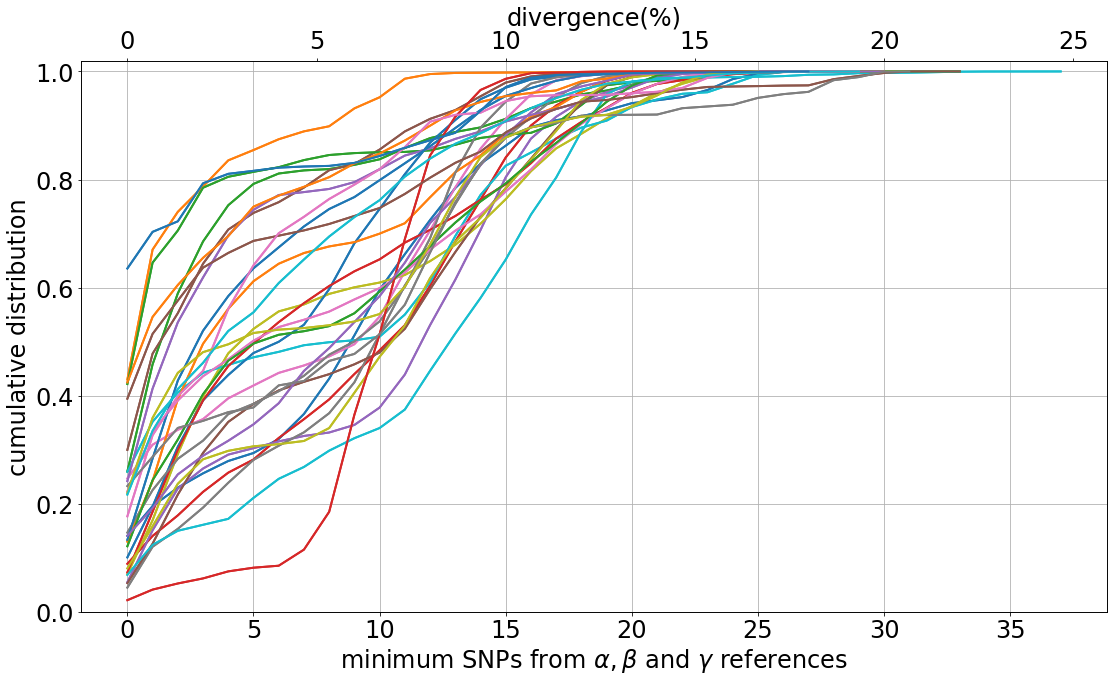

In [9]:
outpath = '/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Single_Cell_Analyses/'

plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,1, figsize = (16,10))
ax2 = ax.twiny()
df_op = pd.DataFrame()

for g in Gene_Blast_grouped:
    if g == 'All':
        continue
    ax.plot(Gene_Blast_grouped[g]['MS50'].index.tolist(), 
            Gene_Blast_grouped[g]['MS50'].Normalized_Counts.tolist() ,
            linewidth = 2)
    ax2.plot(Gene_Blast_grouped[g]['MS50'].Divergence.tolist(), 
             Gene_Blast_grouped[g]['MS50'].Normalized_Counts.tolist(),
             linewidth = 2)
ax.grid()
ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)
ax.set_xlabel(r'minimum SNPs from $\alpha, \beta $ and $\gamma$ references')
ax2.set_xlabel('divergence(%)')
ax.set_ylabel('cumulative distribution')

ax.set_ylim([0,1.02])
fig.tight_layout()

fig.savefig(outpath+'Cumulative-Distribtuion-MS50-All-Loci.pdf')

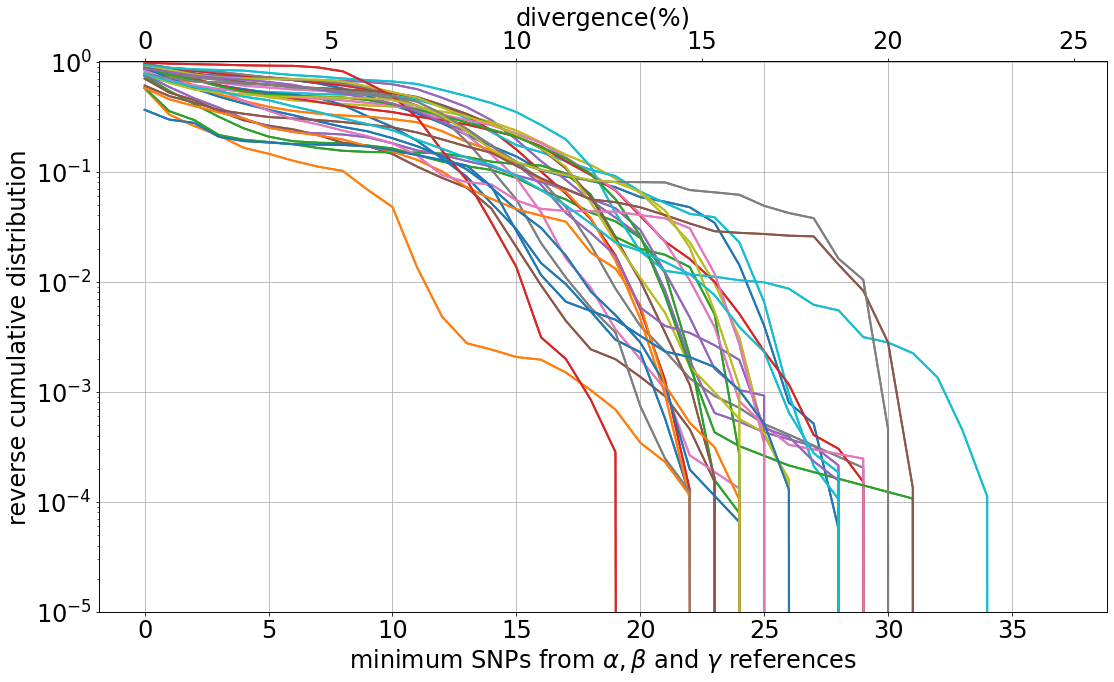

In [10]:
plt.rcParams.update(rcParams)
fig, ax = plt.subplots(1,1, figsize = (16,10))
ax2 = ax.twiny()
df_op = pd.DataFrame()

for g in Gene_Blast_grouped:
    if g == 'All':
        continue
    ax.plot(Gene_Blast_grouped[g]['MS50'].index.tolist(), 
            Gene_Blast_grouped[g]['MS50'].Rev_Cumulative.tolist() ,
            linewidth = 2)
    ax2.plot(Gene_Blast_grouped[g]['MS50'].Divergence.tolist(), 
             Gene_Blast_grouped[g]['MS50'].Rev_Cumulative.tolist(),
             linewidth = 2)
ax.grid()
ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)
ax.set_xlabel(r'minimum SNPs from $\alpha, \beta $ and $\gamma$ references')
ax2.set_xlabel('divergence(%)')
ax.set_ylabel('reverse cumulative distribution')
ax.semilogy()

ax.set_ylim([0.00001,1.02])
fig.tight_layout()

fig.savefig(outpath+'Reverse-Cumulative-Distribtuion-MS50-All-Loci.pdf')


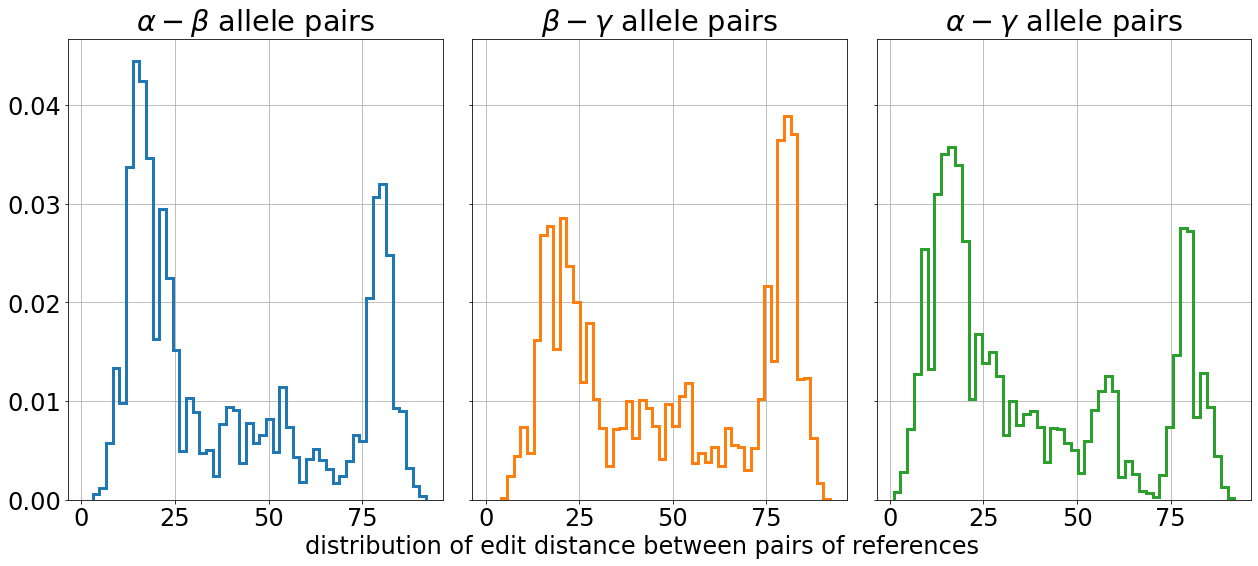

In [26]:
fig, ax = plt.subplots(1,3, figsize = (18,8), sharey = True, sharex = True)
ax[0].hist(d_PW['AB'], bins = 50, histtype = 'step', linewidth = 3, density = True, color = 'C0')
ax[0].grid()
ax[0].set_title(r'$\alpha-\beta$ allele pairs')

ax[1].hist(d_PW['BC'], bins = 50, histtype = 'step', linewidth = 3, density = True, color = 'C1')
ax[1].grid()
ax[1].set_title(r'$\beta-\gamma$ allele pairs')

ax[2].hist(d_PW['AC'], bins = 50, histtype = 'step', linewidth = 3, density = True, color = 'C2')
ax[2].grid()
ax[2].set_title(r'$\alpha-\gamma$ allele pairs')

fig.text(0.25, 0.005, r'distribution of edit distance between pairs of references')
fig.tight_layout()
fig.savefig(outpath+'Distribution-Edit-Distances-Alpha-Beta-Gamma-Alleles.pdf')


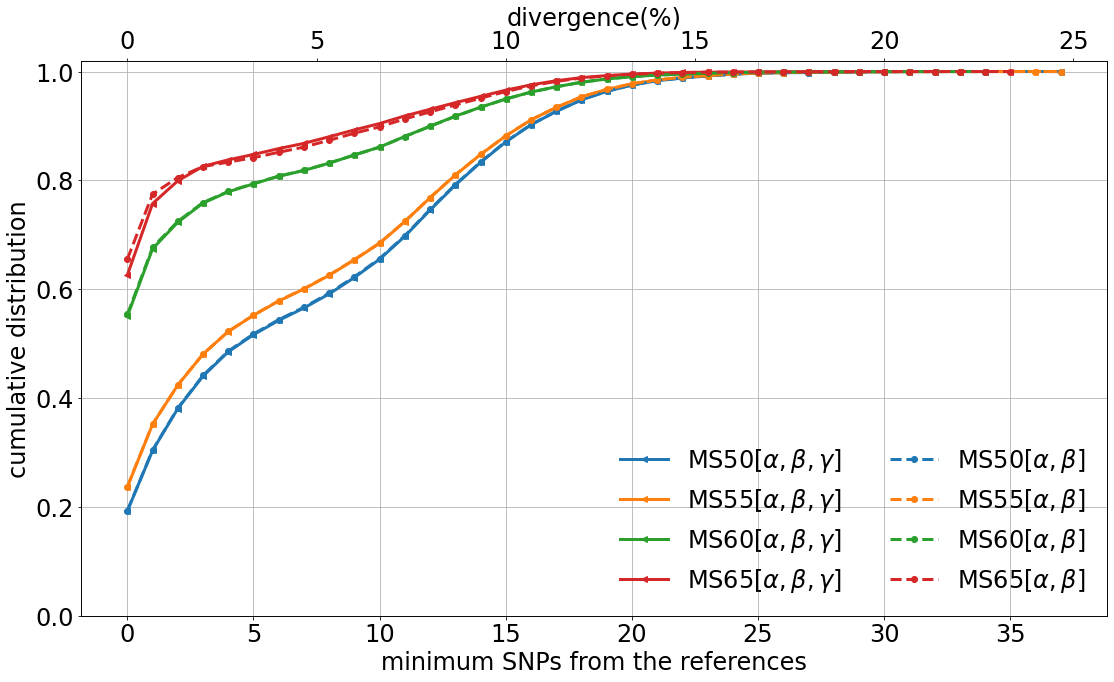

In [27]:
fig, ax = plt.subplots(1,1, figsize = (16,10))
ax2 = ax.twiny()

color = ['C0','C1','C2','C3']
samples = ['MS50','MS55','MS60', 'MS65'] 
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_1 = s + r'$[\alpha, \beta, \gamma]$'
    ax.plot(Gene_Blast_grouped['All'][s].index.tolist(), 
            Gene_Blast_grouped['All'][s].Normalized_Counts.tolist(), 
            linewidth = 3, label = label_1, color = c, marker = '<')
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_2 = s + r'$[\alpha, \beta]$'
    ax.plot(Gene_Blast_grouped_AB['All'][s].index.tolist(), 
            Gene_Blast_grouped_AB['All'][s].Normalized_Counts.tolist(), 
            linestyle = '--', linewidth = 3, label = label_2, color = c, marker = 'o')
ax.grid()
ax.set_xlabel(r'minimum SNPs from the references')
ax2.set_xlabel('divergence(%)')
ax.set_ylabel('cumulative distribution')
ax.set_ylim([0,1.02])
ax.legend(ncol = 2, loc = 4, frameon = False)
ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)

fig.tight_layout()
fig.savefig(outpath+'Cumulative-Distribtuion-All-MS-Samples.pdf')

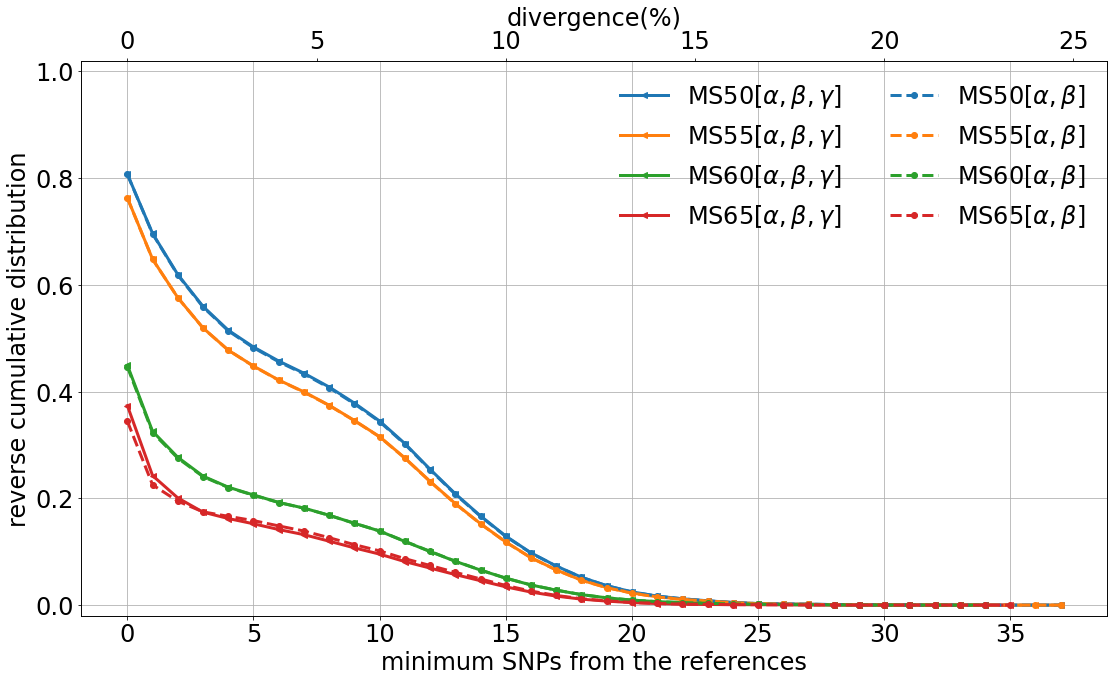

In [29]:
fig, ax = plt.subplots(1,1, figsize = (16,10))
ax2 = ax.twiny()

color = ['C0','C1','C2','C3']
samples = ['MS50','MS55','MS60', 'MS65'] 
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_1 = s + r'$[\alpha, \beta, \gamma]$'
    ax.plot(Gene_Blast_grouped['All'][s].index.tolist(), 
            Gene_Blast_grouped['All'][s].Rev_Cumulative.tolist(), 
            linewidth = 3, label = label_1, color = c, marker = '<')
for i in range(len(samples)):
    s = samples[i]
    c = color[i]
    label_2 = s + r'$[\alpha, \beta]$'
    ax.plot(Gene_Blast_grouped_AB['All'][s].index.tolist(), 
            Gene_Blast_grouped_AB['All'][s].Rev_Cumulative.tolist(), 
            linestyle = '--', linewidth = 3, label = label_2, color = c, marker = 'o')
ax.grid()
ax.set_xlabel(r'minimum SNPs from the references')
ax2.set_xlabel('divergence(%)')
ax.set_ylabel('reverse cumulative distribution')
ax.set_ylim([-0.02,1.02])
ax.legend(ncol = 2, loc = 1, frameon = False)
ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)
fig.tight_layout()
fig.savefig(outpath+'Reverse-Cumulative-Distribtuion-All-MS-Samples.pdf')

In [92]:
df_op = pd.DataFrame()

for s in ['MS50','MS55','MS60', 'MS65']:
    df_op = pd.concat([df_op, Gene_Blast_grouped['All'][s]])
df_op = df_op.reset_index().groupby(['mismatch', 'Divergence']).sum().reset_index().set_index('mismatch')
df_op['Counts'] = df_op['qseqid'].cumsum()
df_op['Normalized_Counts'] = df_op['Counts']/df_op['qseqid'].sum()

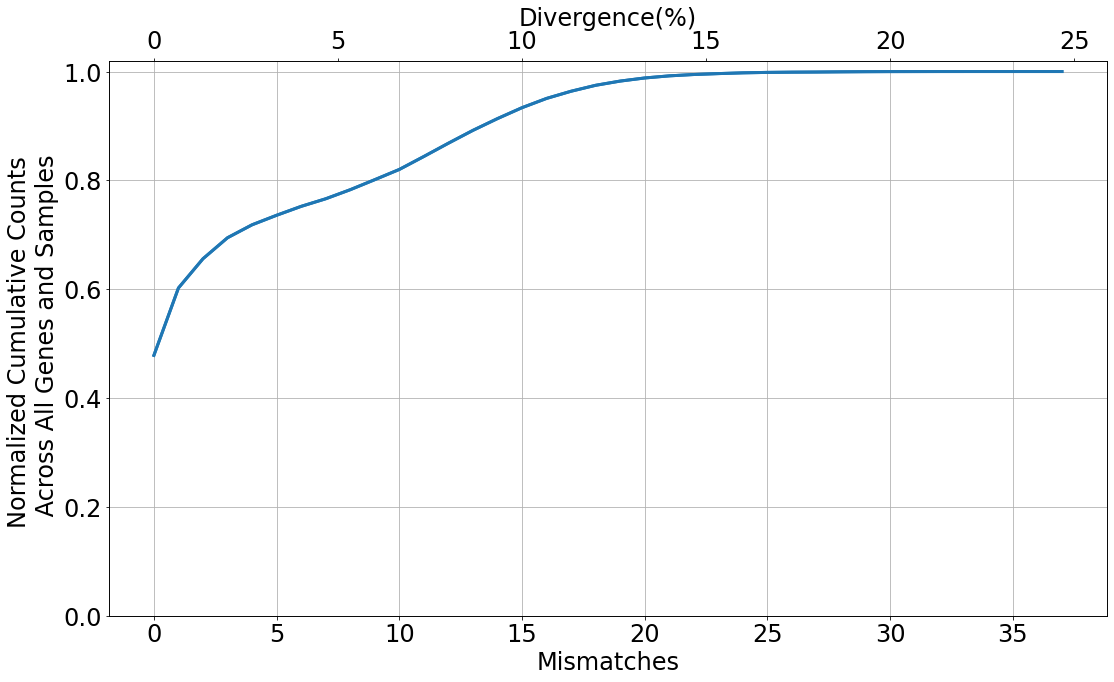

In [93]:
fig, ax = plt.subplots(1,1, figsize = (16,10))
ax2 = ax.twiny()
ax.plot(df_op.index.tolist(), df_op.Normalized_Counts, linewidth = 3)
ax2.plot(df_op.Divergence.tolist(), df_op.Normalized_Counts, linewidth = 3)

ax.grid()
ax.set_ylim([0, 1.02])
ax.set_xlabel('Mismatches')
ax.set_ylabel('Normalized Cumulative Counts \n Across All Genes and Samples')

ax2.set_xlim(ax.get_xlim()[0]/150*100, ax.get_xlim()[1]/150*100)
ax2.set_xlabel('Divergence(%)')
fig.tight_layout()
